# Import the Wine Dataset and kNN algorithm

In [4]:
# Import data analysis and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Imports for machine learning
from sklearn import datasets
from sklearn.model_selection import train_test_split
# specifically for kNN, and the wine dataset
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier

# Information about the dataset

In [5]:
wine_data = load_wine()
print(wine_data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [6]:
X, y = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names), pd.DataFrame(data=wine_data.target, columns=["wine_quality_type"])
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [10]:
# Viewing the targets
y.head()

,wine_quality_type
0,0
1,0
2,0
3,0
4,0


# Making the Model

In [17]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)
y_train, y_test = np.ravel(y_train), np.ravel(y_test)

In [23]:
# Check the shape using NumPy
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

(133, 13)
(45, 13)
(133,)
(45,)


In [52]:
# Instantiation of the model
knn = KNeighborsClassifier(n_neighbors=15)
# NOTE: make sure to supply the number of neighbors to examine for each data point (represented by k)

In [53]:
# Fitting the model to training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

# Making Predictions

In [54]:
# Predicted y-values
y_pred = knn.predict(X_test)
print(y_pred)

[0 1 1 0 1 1 0 2 1 1 2 1 0 2 2 1 0 0 1 0 1 0 2 2 2 1 1 1 2 2 0 0 2 0 0 0 2
 1 1 2 0 0 1 2 1]


# Assessing the Model

In [55]:
# Check 1: Using the shape of the predicted and test values for y
y_test.shape

(45,)

In [56]:
y_pred.shape

(45,)

In [57]:
knn.score(X_test, y_test)

0.8

### Not bad. Definitely room for improvement!

# Visualizing Model Parameters

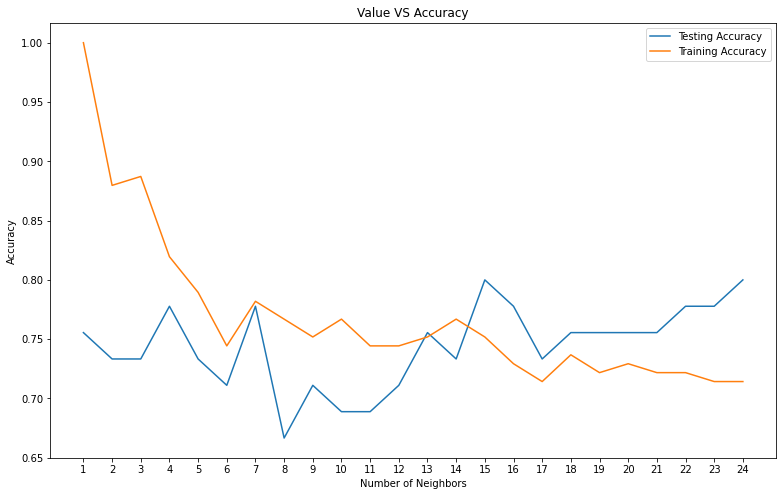

Best Accuracy is 0.8 with K=15


In [50]:

neighbors = np.arange(1, 25)
train_accuracy, test_accuracy = list(), list()

for iterator, kterator in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=kterator)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.figure(figsize=[13, 8])
plt.plot(neighbors, test_accuracy, label="Testing Accuracy")
plt.plot(neighbors, train_accuracy, label="Training Accuracy")
plt.legend()
plt.title("Value VS Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.xticks(neighbors)
plt.savefig("knn_accuracies.png")
plt.show()

print("Best Accuracy is {} with K={}".format(np.max(test_accuracy), 1 + test_accuracy.index(np.max(test_accuracy))))